# Convert TVC forcing files to CLASSIC
https://cccma.gitlab.io/classic/makeInputFiles.html

In [1]:
# Env: sc2_v0

import xarray as xr
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import proplot as pplt # New plot library (https://proplot.readthedocs.io/en/latest/)
pplt.rc['savefig.dpi'] = 300 # 1200 is too big! #https://proplot.readthedocs.io/en/latest/basics.html#Creating-figures
import os

## Trail Valley Creak, northwestern Canada

The site is a low-center polygon, with herb tundra and no erect vegetation

| Short name | umt |
|:-----------|:----|
| Location | 68.74617°N, 133.50171°W |
| Elevation | 85 m |
| Snow-free albedo | - |
| Simulation period | 2013 to 2019 |
| Temperature/humidity measurement height | 2 m |
| Wind measurement height | 4 m |
| Reference | Dutch et al. ([2022](https://tc.copernicus.org/articles/16/4201/2022/)) |

Southern Arctic tundra site, erect-shrub tundra, tundra dominated by low shrubs <40 cm, continuous permafrost
Elevation: 85 m

Vegetation:
- dominant plant species: Graminoids (Carex spp.), deciduous (Vaccinum uliginosum, Betula glandulosa, Salix glauca) and evergreen
shrubs (Rhododendron groenlandicum)
- rooting depth: maximum set to 40 cm
- average plant height < 40 cm
- average LAI: 0.66 ± 0.11 m2/m2
- plant cover: 92.5 % vascular plants, 31.5 % moss, 51 % lichen
- Bowen ratio:

Climate:
- mean annual precipitation: 240.6 mm (Fluxnet)
- mean annual temperature: -8.2 degrees C (Fluxnet)

Soils:
- silty clay to silt loam
- soil organic matter content:
- continuous permafrost with average thaw depth of 0.74 ± 0.05 m

Soil composition (sand/clay/silt): 18 ± 3 cm organic layer depth  
	mineral soil   35 % sand / 40 % clay (Marsh et al., [2010](https://onlinelibrary.wiley.com/doi/10.1002/hyp.7786))  
                 21 % sand / 16 % clay (Julia Boike, [AWI](https://doi.pangaea.de/10.1594/PANGAEA.962726))

Soil permeable depth: set to 9 m 

PI: Oliver Sonnentag

In [2]:
site = 'tvc'
site_longname = 'Trail Valley Creek, northwestern Canada'

year_start = '2013'
year_end = '2019'

lat = 68.74617
lon = -133.50171

path = '/home/lalandmi/Dropbox/data/ESM-SnowMIP_all/TVC/TVCSnowCLM/TVCMetData'
path_tmp = '/home/lalandmi/Dropbox/data/SnowMIP/forcing/CLASSIC/tmp'
path_out = '/home/lalandmi/Dropbox/data/SnowMIP/forcing/CLASSIC/'+site
path_out_CLASSIC = '/home/lalandmi/eccc/classic-develop/inputFiles/SnowArctic/'+site+'/forcing'

if os.path.exists(path_out):
    print(path_out+' already exist.')
else:
    os.makedirs(path_out)
    print(path_out+' has been created!')

if os.path.exists(path_out_CLASSIC):
    print(path_out_CLASSIC+' already exist.')
else:
    os.makedirs(path_out_CLASSIC)
    print(path_out_CLASSIC+' has been created!')

/home/lalandmi/Dropbox/data/SnowMIP/forcing/CLASSIC/tvc already exist.
/home/lalandmi/eccc/classic-develop/inputFiles/SnowArctic/tvc/forcing already exist.


## Open the new file with absolute time

In [5]:
ds = xr.open_dataset(path_tmp+'/met_insitu_'+site+'_30min_ext_'+year_start+'_'+year_end+'_a_no_leap.nc')
ds

<xarray.Dataset> Size: 9MB
Dimensions:    (time: 122640)
Coordinates:
  * time       (time) float64 981kB 2.013e+07 2.013e+07 ... 2.019e+07 2.019e+07
Data variables:
    LWdown     (time) float64 981kB ...
    TotPrecip  (time) float64 981kB ...
    Tair       (time) float64 981kB ...
    RH         (time) float64 981kB ...
    Wind       (time) float64 981kB ...
    Psurf      (time) float64 981kB ...
    SWdown     (time) float64 981kB ...
    Qair       (time) float64 981kB ...
Attributes:
    CDI:          Climate Data Interface version 2.1.1 (https://mpimet.mpg.de...
    Conventions:  CF-1.6
    Location:     Field site located at Latitude:68.75 Longitude:226.50
    History:      File created by V. R. Dutch in Dec 2020 using TVC Station d...
    Institution:  Northumbria University, UK
    history:      Tue Nov 19 17:10:25 2024: cdo del29feb /home/lalandmi/Dropb...
    CDO:          Climate Data Operators version 2.1.1 (https://mpimet.mpg.de...

In [6]:
ds.time

<xarray.DataArray 'time' (time: 122640)> Size: 981kB
array([20130101.      , 20130101.020833, 20130101.041667, ..., 20191231.9375  ,
       20191231.958333, 20191231.979167])
Coordinates:
  * time     (time) float64 981kB 2.013e+07 2.013e+07 ... 2.019e+07 2.019e+07
Attributes:
    standard_name:  time
    units:          day as %Y%m%d.%f
    calendar:       365_day
    axis:           T

### Add the lat/lon dimensions of the site (<mark>required by CLASSIC</mark>)

Note: the values of the coordinates does not seem to matter for CLASSIC (the attributes neither)

In [7]:
ds = ds.assign_coords(lon=lon)
ds = ds.expand_dims('lon')
ds['lon'] = ds.lon.assign_attrs(
    standard_name='Longitude',
    units='degrees_east',
    axis='X'
)

ds = ds.assign_coords(lat=lat)
ds = ds.expand_dims('lat')
ds['lat'] = ds.lat.assign_attrs(
    standard_name='Latitude',
    units='degrees_north',
    axis='Y'
)

# Transpose the dimension to put the time first (as required by CLASSIC)
ds = ds.transpose('time', 'lat', 'lon')

ds

<xarray.Dataset> Size: 9MB
Dimensions:    (time: 122640, lat: 1, lon: 1)
Coordinates:
  * time       (time) float64 981kB 2.013e+07 2.013e+07 ... 2.019e+07 2.019e+07
  * lon        (lon) float64 8B -133.5
  * lat        (lat) float64 8B 68.75
Data variables:
    LWdown     (time, lat, lon) float64 981kB 238.0 237.3 236.7 ... 200.9 267.4
    TotPrecip  (time, lat, lon) float64 981kB 7.936e-06 7.536e-06 ... 4.633e-06
    Tair       (time, lat, lon) float64 981kB -18.8 -19.0 -19.2 ... -23.1 -7.75
    RH         (time, lat, lon) float64 981kB 85.0 85.0 85.0 ... 79.0 79.0 90.5
    Wind       (time, lat, lon) float64 981kB 4.167 4.167 4.167 ... 3.333 5.833
    Psurf      (time, lat, lon) float64 981kB 1.006e+05 1.007e+05 ... 9.786e+04
    SWdown     (time, lat, lon) float64 981kB 1e-10 1e-10 1e-10 ... 1e-10 1e-10
    Qair       (time, lat, lon) float64 981kB 0.0006084 0.0005968 ... 0.001824
Attributes:
    CDI:          Climate Data Interface version 2.1.1 (https://mpimet.mpg.de...
    Conventions:  CF-1.6
    Location:     Field site located at Latitude:68.75 Longitude:226.50
    History:      File created by V. R. Dutch in Dec 2020 using TVC Station d...
    Institution:  Northumbria University, UK
    history:      Tue Nov 19 17:10:25 2024: cdo del29feb /home/lalandmi/Dropb...
    CDO:          Climate Data Operators version 2.1.1 (https://mpimet.mpg.de...

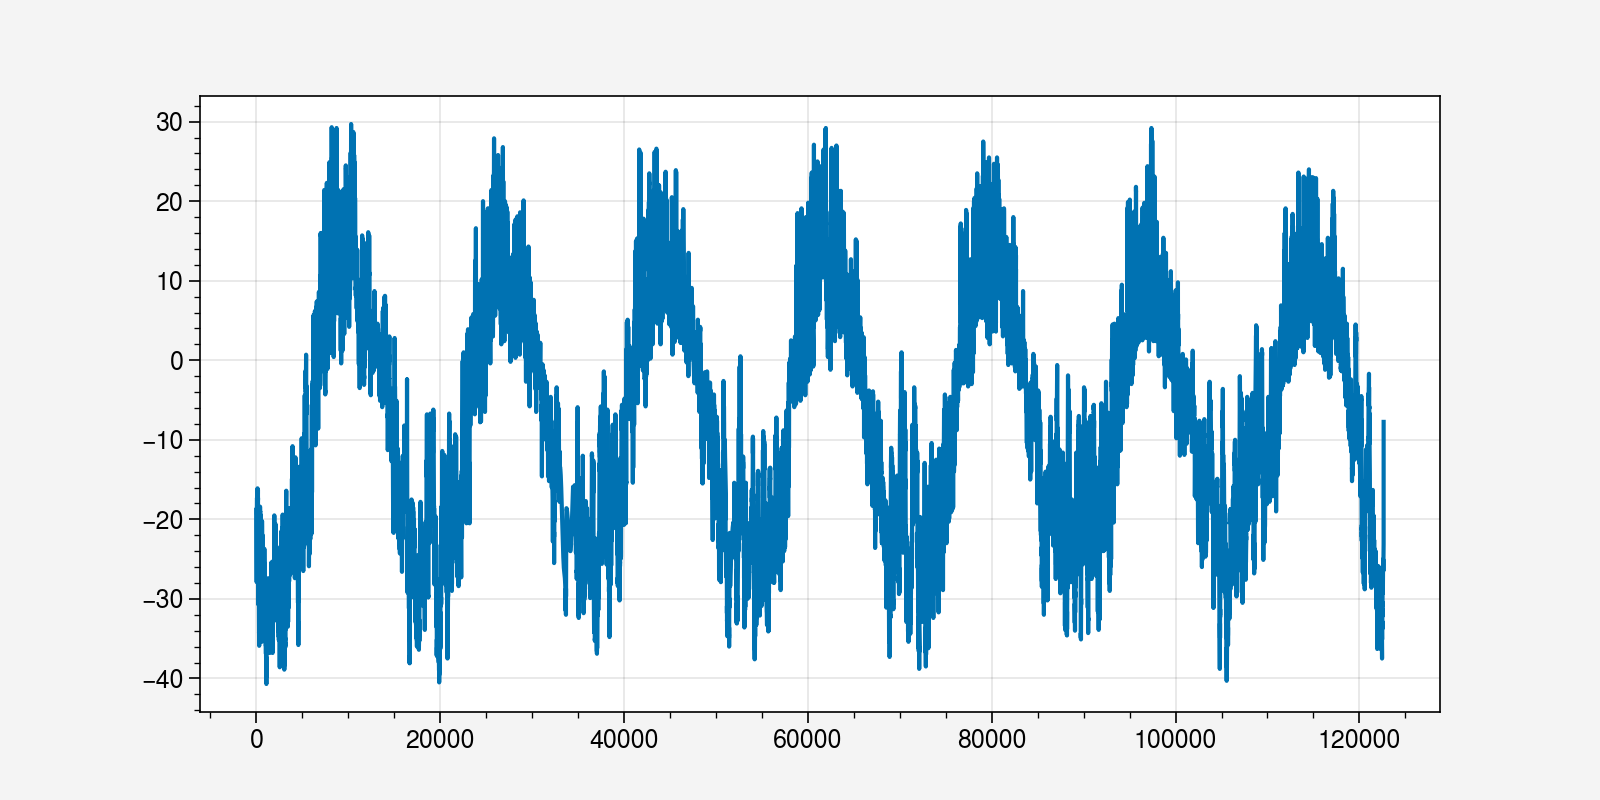

In [9]:
%matplotlib inline
plt.figure(figsize=(8,4))
plt.plot(ds.Tair.squeeze().values)

## The CDO command add back the leap days 

122639

In [10]:
ds.Tair.isnull().any()

<xarray.DataArray 'Tair' ()> Size: 1B
array(False)

In [61]:
ds.time

<xarray.DataArray 'time' (time: 122640)> Size: 981kB
array([20130101.      , 20130101.020833, 20130101.041667, ..., 20191231.9375  ,
       20191231.958333, 20191231.979167])
Coordinates:
  * time     (time) float64 981kB 2.013e+07 2.013e+07 ... 2.019e+07 2.019e+07
Attributes:
    standard_name:  time
    units:          day as %Y%m%d.%f
    calendar:       365_day
    axis:           T

### Partition Rainf and Snowf (<mark>required by CLASSIC</mark>)

In [15]:
ds['Rainf'] = ds.TotPrecip.where(ds.Tair > 1, other=0)
ds

<xarray.Dataset> Size: 10MB
Dimensions:    (time: 122640, lat: 1, lon: 1)
Coordinates:
  * time       (time) float64 981kB 2.013e+07 2.013e+07 ... 2.019e+07 2.019e+07
  * lon        (lon) float64 8B -133.5
  * lat        (lat) float64 8B 68.75
Data variables:
    LWdown     (time, lat, lon) float64 981kB 238.0 237.3 236.7 ... 200.9 267.4
    TotPrecip  (time, lat, lon) float64 981kB 7.936e-06 7.536e-06 ... 4.633e-06
    Tair       (time, lat, lon) float64 981kB -18.8 -19.0 -19.2 ... -23.1 -7.75
    RH         (time, lat, lon) float64 981kB 85.0 85.0 85.0 ... 79.0 79.0 90.5
    Wind       (time, lat, lon) float64 981kB 4.167 4.167 4.167 ... 3.333 5.833
    Psurf      (time, lat, lon) float64 981kB 1.006e+05 1.007e+05 ... 9.786e+04
    SWdown     (time, lat, lon) float64 981kB 1e-10 1e-10 1e-10 ... 1e-10 1e-10
    Qair       (time, lat, lon) float64 981kB 0.0006084 0.0005968 ... 0.001824
    Rainf      (time, lat, lon) float64 981kB 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0
Attributes:
    CDI:          Climate Data Interface version 2.1.1 (https://mpimet.mpg.de...
    Conventions:  CF-1.6
    Location:     Field site located at Latitude:68.75 Longitude:226.50
    History:      File created by V. R. Dutch in Dec 2020 using TVC Station d...
    Institution:  Northumbria University, UK
    history:      Tue Nov 19 17:10:25 2024: cdo del29feb /home/lalandmi/Dropb...
    CDO:          Climate Data Operators version 2.1.1 (https://mpimet.mpg.de...

In [34]:
ds['Snowf'] = ds.TotPrecip.where(ds.Tair <= 1, other=0) * 2
ds

<xarray.Dataset> Size: 11MB
Dimensions:    (time: 122640, lat: 1, lon: 1)
Coordinates:
  * time       (time) float64 981kB 2.013e+07 2.013e+07 ... 2.019e+07 2.019e+07
  * lon        (lon) float64 8B -133.5
  * lat        (lat) float64 8B 68.75
Data variables:
    LWdown     (time, lat, lon) float64 981kB 238.0 237.3 236.7 ... 200.9 267.4
    TotPrecip  (time, lat, lon) float64 981kB 7.936e-06 7.536e-06 ... 4.633e-06
    Tair       (time, lat, lon) float64 981kB -18.8 -19.0 -19.2 ... -23.1 -7.75
    RH         (time, lat, lon) float64 981kB 85.0 85.0 85.0 ... 79.0 79.0 90.5
    Wind       (time, lat, lon) float64 981kB 4.167 4.167 4.167 ... 3.333 5.833
    Psurf      (time, lat, lon) float64 981kB 1.006e+05 1.007e+05 ... 9.786e+04
    SWdown     (time, lat, lon) float64 981kB 1e-10 1e-10 1e-10 ... 1e-10 1e-10
    Qair       (time, lat, lon) float64 981kB 0.0006084 0.0005968 ... 0.001824
    Rainf      (time, lat, lon) float64 981kB 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0
    Snowf      (time, lat, lon) float64 981kB 1.587e-05 1.507e-05 ... 9.266e-06
Attributes:
    CDI:          Climate Data Interface version 2.1.1 (https://mpimet.mpg.de...
    Conventions:  CF-1.6
    Location:     Field site located at Latitude:68.75 Longitude:226.50
    History:      File created by V. R. Dutch in Dec 2020 using TVC Station d...
    Institution:  Northumbria University, UK
    history:      Tue Nov 19 17:10:25 2024: cdo del29feb /home/lalandmi/Dropb...
    CDO:          Climate Data Operators version 2.1.1 (https://mpimet.mpg.de...

In [35]:
ds['TotPrecip'] = ds.TotPrecip.where(ds.Tair > 1, other=ds.Snowf)

KeyError: 'long_name'

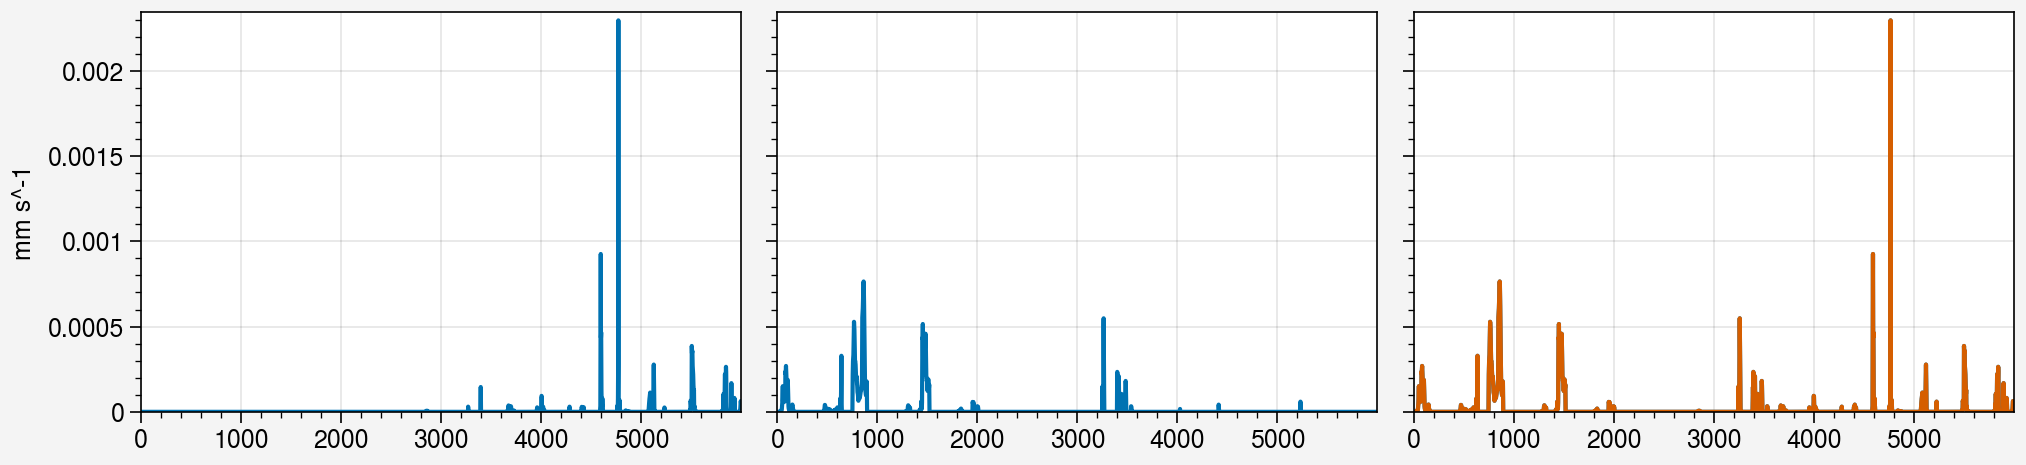

In [36]:
%matplotlib inline
fig, axs = pplt.subplots(ncols=3, nrows=1, refaspect=1.5, refwidth=3)

i_start = 2000*2
i_end = 5000*2

axs[0].plot(ds.Rainf.squeeze().values[i_start:i_end])
axs[1].plot(ds.Snowf.squeeze().values[i_start:i_end])
axs[2].plot(ds.Rainf.squeeze().values[i_start:i_end] + ds.Snowf.squeeze().values[i_start:i_end])
axs[2].plot(ds.TotPrecip.squeeze().values[i_start:i_end])

for ax in axs:
    ax.format(
        ylabel=ds.Rainf.attrs['units'], 
        ylim=(0,max(ds.Rainf.squeeze().values[i_start:i_end] + ds.Snowf.squeeze().values[i_start:i_end]).item(0) + 0.00005)
    )
    
axs.format(
    collabels=[ds.Rainf.attrs['long_name'], ds.Snowf.attrs['long_name'], 'Total precipitation']
)


## All the procedure may introduce negative precip values due to computing precision so replace them by 0

In [37]:
ds['TotPrecip'] = ds.TotPrecip.where(ds.TotPrecip > 0, other=0)
ds.TotPrecip.min()

<xarray.DataArray 'TotPrecip' ()> Size: 8B
array(0.)

In [38]:
ds['Snowf'] = ds.Snowf.where(ds.Snowf > 0, other=0)
ds.Snowf.min()

<xarray.DataArray 'Snowf' ()> Size: 8B
array(0.)

In [39]:
ds.TotPrecip.sum()

<xarray.DataArray 'TotPrecip' ()> Size: 8B
array(1.52192074)

In [40]:
ds.Rainf.sum() + ds.Snowf.sum()

<xarray.DataArray ()> Size: 8B
array(1.52192074)

In [41]:
np.testing.assert_equal(ds.TotPrecip.where(ds.TotPrecip < 0).sum().values, 0)

## Save forcing files

CLASSIC **requires** <mark>one file per forcing variable</mark>

Note: I save the files directly to CLASSIC folder and here to keep more flexibility in the future

In [42]:
for key in list(ds.keys()):
    ds[key].to_netcdf(path_out+'/met_insitu_'+site+'_30min_ext_2xSnowf'+year_start+'_'+year_end+'_'+key+'.nc')
    ds[key].to_netcdf(path_out_CLASSIC+'/met_insitu_'+site+'_30min_ext_2xSnowf'+year_start+'_'+year_end+'_'+key+'.nc')

In [43]:
!ls {path_out}

met_insitu_tvc_30min_ext_2013_2019_LWdown.nc
met_insitu_tvc_30min_ext_2013_2019_Psurf.nc
met_insitu_tvc_30min_ext_2013_2019_Qair.nc
met_insitu_tvc_30min_ext_2013_2019_RH.nc
met_insitu_tvc_30min_ext_2013_2019_SWdown.nc
met_insitu_tvc_30min_ext_2013_2019_Tair.nc
met_insitu_tvc_30min_ext_2013_2019_TotPrecip.nc
met_insitu_tvc_30min_ext_2013_2019_Wind.nc
met_insitu_tvc_30min_ext_2xSnowf2013_2019_LWdown.nc
met_insitu_tvc_30min_ext_2xSnowf2013_2019_Psurf.nc
met_insitu_tvc_30min_ext_2xSnowf2013_2019_Qair.nc
met_insitu_tvc_30min_ext_2xSnowf2013_2019_Rainf.nc
met_insitu_tvc_30min_ext_2xSnowf2013_2019_RH.nc
met_insitu_tvc_30min_ext_2xSnowf2013_2019_Snowf.nc
met_insitu_tvc_30min_ext_2xSnowf2013_2019_SWdown.nc
met_insitu_tvc_30min_ext_2xSnowf2013_2019_Tair.nc
met_insitu_tvc_30min_ext_2xSnowf2013_2019_TotPrecip.nc
met_insitu_tvc_30min_ext_2xSnowf2013_2019_Wind.nc
met_insitu_tvc_30min_ext_Snowf2013_2019_LWdown.nc
met_insitu_tvc_30min_ext_Snowf2013_2019_Psurf.nc
met_insitu_tvc_30min_ext_Snowf2013_2019

In [44]:
!ls {path_out_CLASSIC}

met_insitu_tvc_30min_ext_2013_2019_LWdown.nc
met_insitu_tvc_30min_ext_2013_2019_Psurf.nc
met_insitu_tvc_30min_ext_2013_2019_Qair.nc
met_insitu_tvc_30min_ext_2013_2019_RH.nc
met_insitu_tvc_30min_ext_2013_2019_SWdown.nc
met_insitu_tvc_30min_ext_2013_2019_Tair.nc
met_insitu_tvc_30min_ext_2013_2019_TotPrecip.nc
met_insitu_tvc_30min_ext_2013_2019_Wind.nc
met_insitu_tvc_30min_ext_2xSnowf2013_2019_LWdown.nc
met_insitu_tvc_30min_ext_2xSnowf2013_2019_Psurf.nc
met_insitu_tvc_30min_ext_2xSnowf2013_2019_Qair.nc
met_insitu_tvc_30min_ext_2xSnowf2013_2019_Rainf.nc
met_insitu_tvc_30min_ext_2xSnowf2013_2019_RH.nc
met_insitu_tvc_30min_ext_2xSnowf2013_2019_Snowf.nc
met_insitu_tvc_30min_ext_2xSnowf2013_2019_SWdown.nc
met_insitu_tvc_30min_ext_2xSnowf2013_2019_Tair.nc
met_insitu_tvc_30min_ext_2xSnowf2013_2019_TotPrecip.nc
met_insitu_tvc_30min_ext_2xSnowf2013_2019_Wind.nc
met_insitu_tvc_30min_ext_Snowf2013_2019_LWdown.nc
met_insitu_tvc_30min_ext_Snowf2013_2019_Psurf.nc
met_insitu_tvc_30min_ext_Snowf2013_2019

In [25]:
!ncdump -h {path_out_CLASSIC}/metVar_lw.nc

netcdf metVar_lw {
dimensions:
	lon = 1 ;
	lat = 1 ;
	time = 122688 ;
variables:
	double lon(lon) ;
		lon:standard_name = "Longitude" ;
		lon:units = "degrees_east" ;
		lon:axis = "X" ;
	double lat(lat) ;
		lat:standard_name = "Latitude" ;
		lat:units = "degrees_north" ;
		lat:axis = "Y" ;
	double time(time) ;
		time:standard_name = "time" ;
		time:units = "day as YYYYMMDD.FFFF" ;
		time:calendar = "proleptic_gregorian" ;
	double lw(time, lat, lon) ;
		lw:_FillValue = 1.e+38 ;

// global attributes:
		:title = "Incoming long wave radiation" ;
		:units = "" ;
		:grid_type = "gaussian" ;
		:_FillValue = 1.e+38 ;
}


In [26]:
!ncdump -h {path_out_CLASSIC}/met_insitu_tvc_30min_ext_2013_2019_TotPrecip.nc

netcdf met_insitu_tvc_30min_ext_2013_2019_TotPrecip {
dimensions:
	time = 122688 ;
	lon = 1 ;
	lat = 1 ;
variables:
	double time(time) ;
		time:_FillValue = NaN ;
		time:standard_name = "time" ;
		time:units = "day as %Y%m%d.%f" ;
		time:calendar = "proleptic_gregorian" ;
		time:axis = "T" ;
	double lon(lon) ;
		lon:_FillValue = NaN ;
		lon:standard_name = "Longitude" ;
		lon:units = "degrees_east" ;
		lon:axis = "X" ;
	double lat(lat) ;
		lat:_FillValue = NaN ;
		lat:standard_name = "Latitude" ;
		lat:units = "degrees_north" ;
		lat:axis = "Y" ;
	double TotPrecip(time, lat, lon) ;
		TotPrecip:_FillValue = NaN ;
		TotPrecip:long_name = "Precipitation" ;
		TotPrecip:units = "mm s^-1" ;
		TotPrecip:mode = "time-dependent" ;
		TotPrecip:missing_value = NaN ;
}


In [27]:
forcing_gesa = xr.open_mfdataset(path_out_CLASSIC+'/metVar_*.nc')
forcing_gesa

<xarray.Dataset> Size: 8MB
Dimensions:  (lon: 1, lat: 1, time: 122688)
Coordinates:
  * lon      (lon) float64 8B -133.5
  * lat      (lat) float64 8B 68.75
  * time     (time) float64 982kB 2.013e+07 2.013e+07 ... 2.019e+07 2.019e+07
Data variables:
    ap       (time, lat, lon) float64 982kB dask.array<chunksize=(122688, 1, 1), meta=np.ndarray>
    lw       (time, lat, lon) float64 982kB dask.array<chunksize=(122688, 1, 1), meta=np.ndarray>
    pr       (time, lat, lon) float64 982kB dask.array<chunksize=(122688, 1, 1), meta=np.ndarray>
    qa       (time, lat, lon) float64 982kB dask.array<chunksize=(122688, 1, 1), meta=np.ndarray>
    sw       (time, lat, lon) float64 982kB dask.array<chunksize=(122688, 1, 1), meta=np.ndarray>
    ta       (time, lat, lon) float64 982kB dask.array<chunksize=(122688, 1, 1), meta=np.ndarray>
    wi       (time, lat, lon) float64 982kB dask.array<chunksize=(122688, 1, 1), meta=np.ndarray>
Attributes:
    title:       Atmospheric pressure
    units:       Pa
    grid_type:   gaussian
    _FillValue:  1e+38

In [28]:
ds

<xarray.Dataset> Size: 9MB
Dimensions:    (time: 122688, lat: 1, lon: 1)
Coordinates:
  * time       (time) float64 982kB 2.013e+07 2.013e+07 ... 2.019e+07 2.019e+07
  * lon        (lon) float64 8B -133.5
  * lat        (lat) float64 8B 68.75
Data variables:
    LWdown     (time, lat, lon) float64 982kB 238.0 237.3 236.7 ... 200.9 267.4
    TotPrecip  (time, lat, lon) float64 982kB 7.936e-06 7.536e-06 ... 4.633e-06
    Tair       (time, lat, lon) float64 982kB -18.8 -19.0 -19.2 ... -23.1 -7.75
    RH         (time, lat, lon) float64 982kB 85.0 85.0 85.0 ... 79.0 79.0 90.5
    Wind       (time, lat, lon) float64 982kB 4.167 4.167 4.167 ... 3.333 5.833
    Psurf      (time, lat, lon) float64 982kB 1.006e+05 1.007e+05 ... 9.786e+04
    SWdown     (time, lat, lon) float64 982kB 1e-10 1e-10 1e-10 ... 1e-10 1e-10
    Qair       (time, lat, lon) float64 982kB 0.0006084 0.0005968 ... 0.001824
Attributes:
    CDI:          Climate Data Interface version 2.1.1 (https://mpimet.mpg.de...
    Conventions:  CF-1.6
    Location:     Field site located at Latitude:68.75 Longitude:226.50
    History:      File created by V. R. Dutch in Dec 2020 using TVC Station d...
    Institution:  Northumbria University, UK
    history:      Tue Nov 19 16:29:17 2024: cdo -a -f nc copy /home/lalandmi/...
    CDO:          Climate Data Operators version 2.1.1 (https://mpimet.mpg.de...

In [49]:
list(ds.keys())

['LWdown', 'TotPrecip', 'Tair', 'RH', 'Wind', 'Psurf', 'SWdown', 'Qair']

In [50]:
list(forcing_gesa.keys())

['ap', 'lw', 'pr', 'qa', 'sw', 'ta', 'wi']

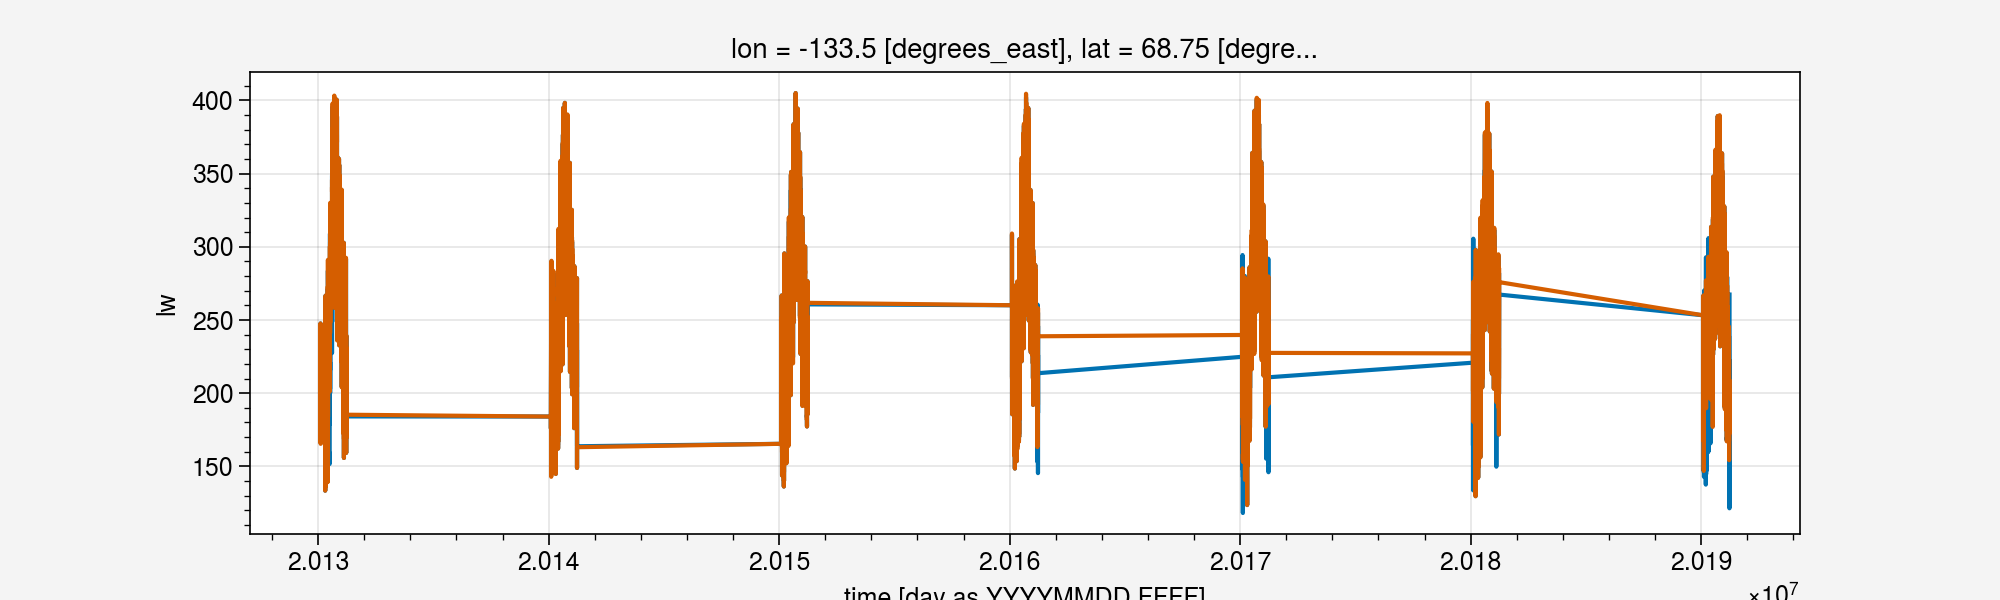

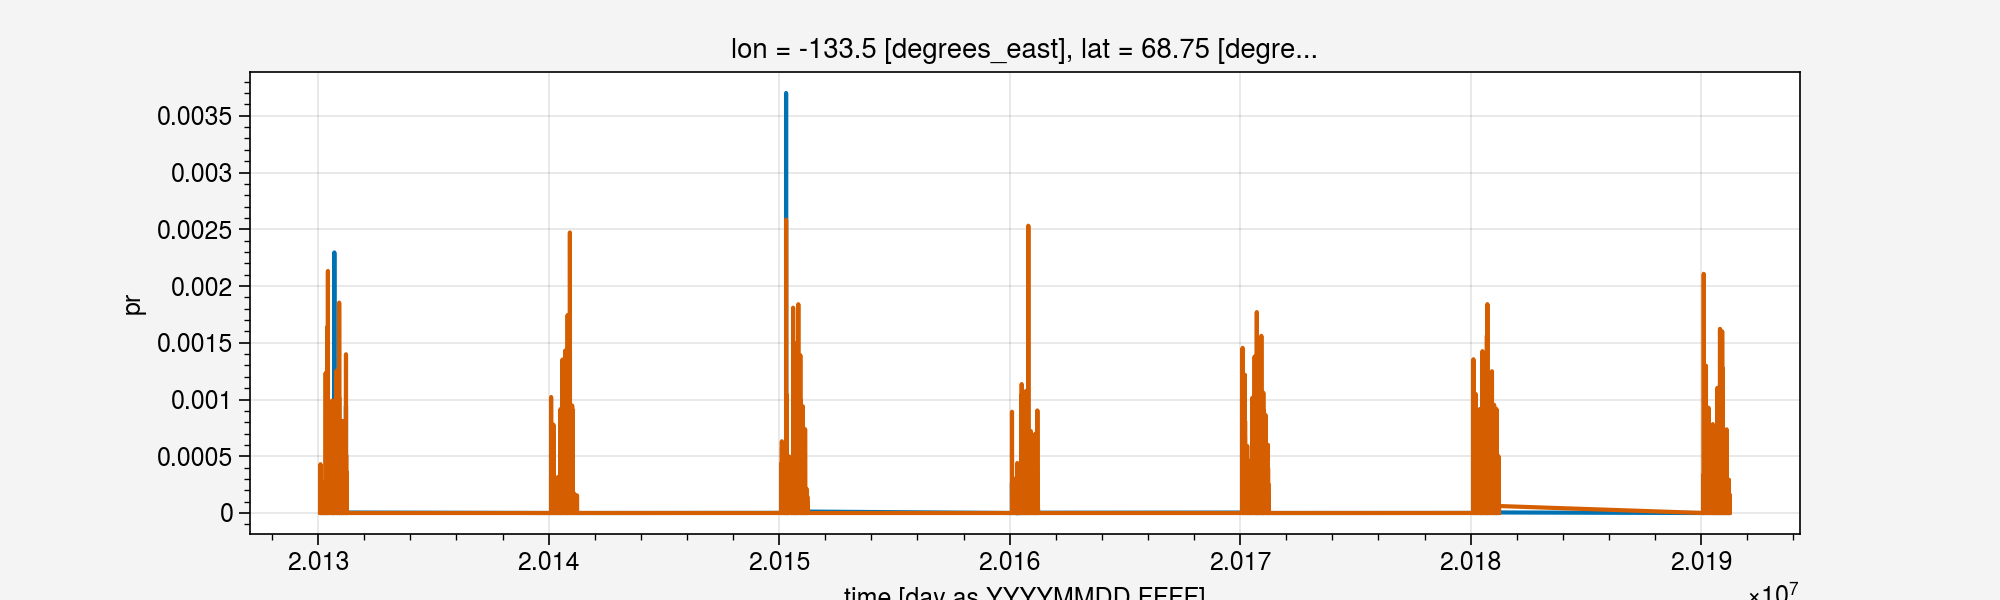

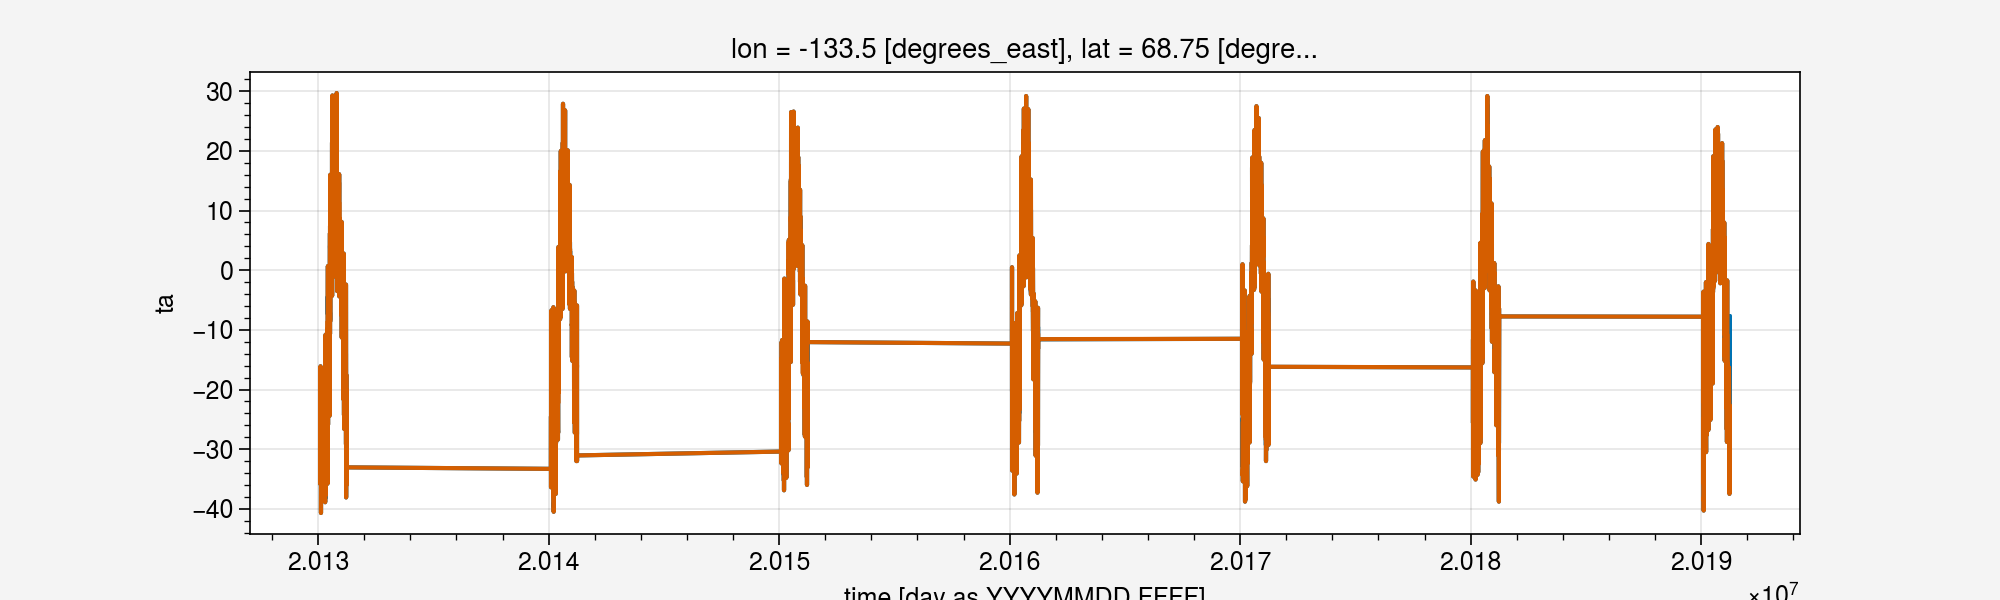

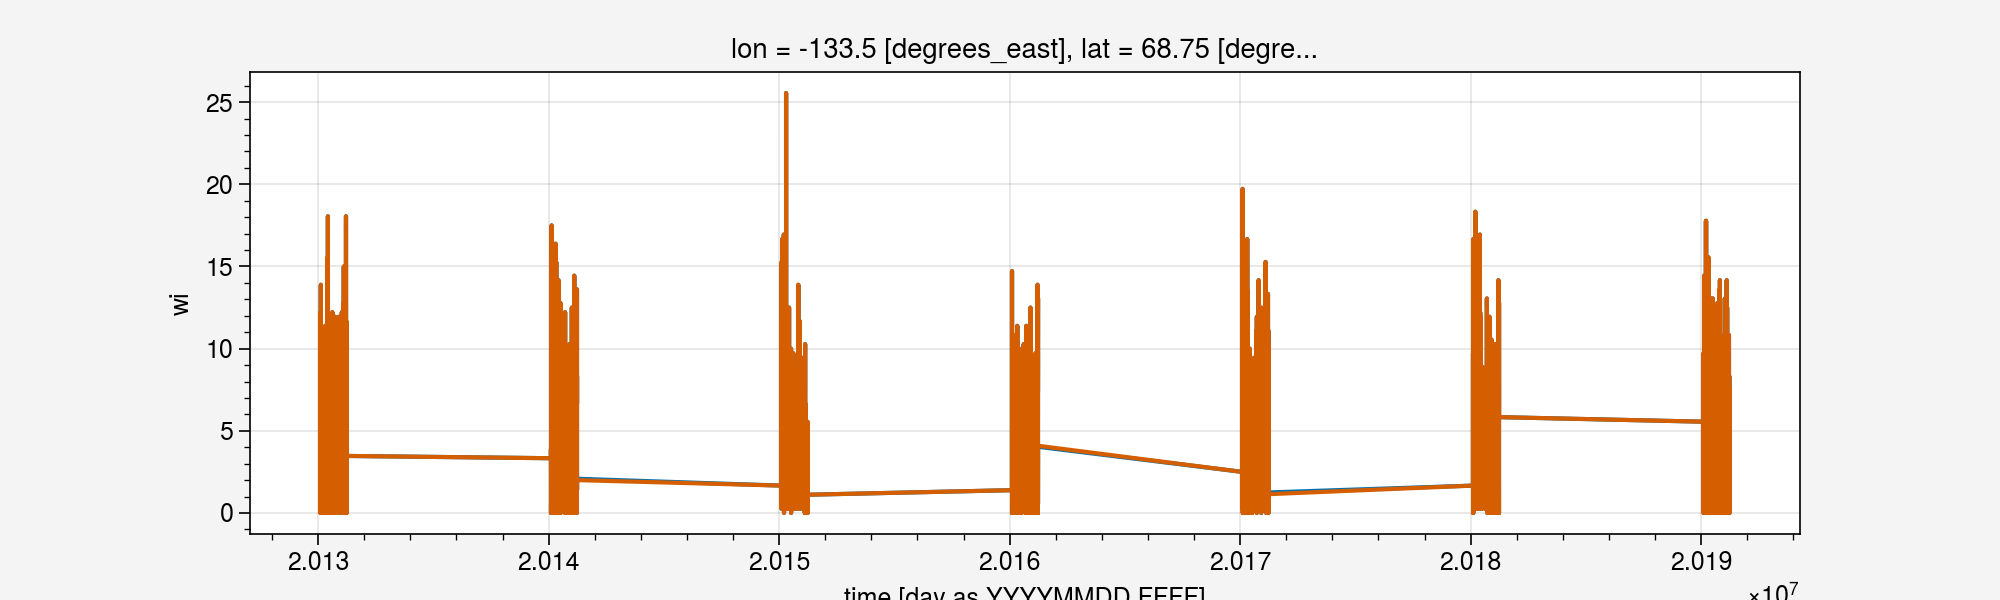

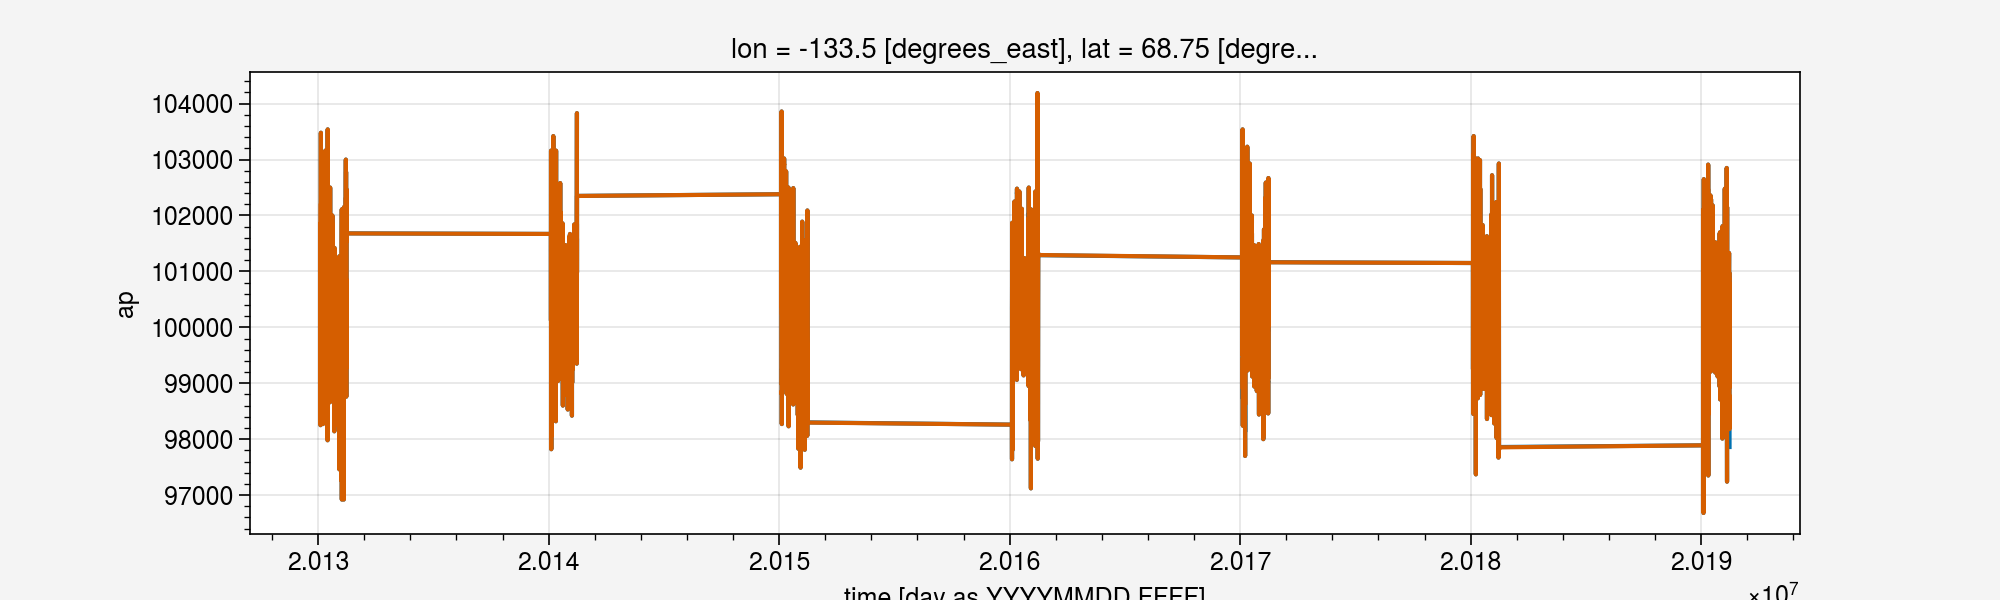

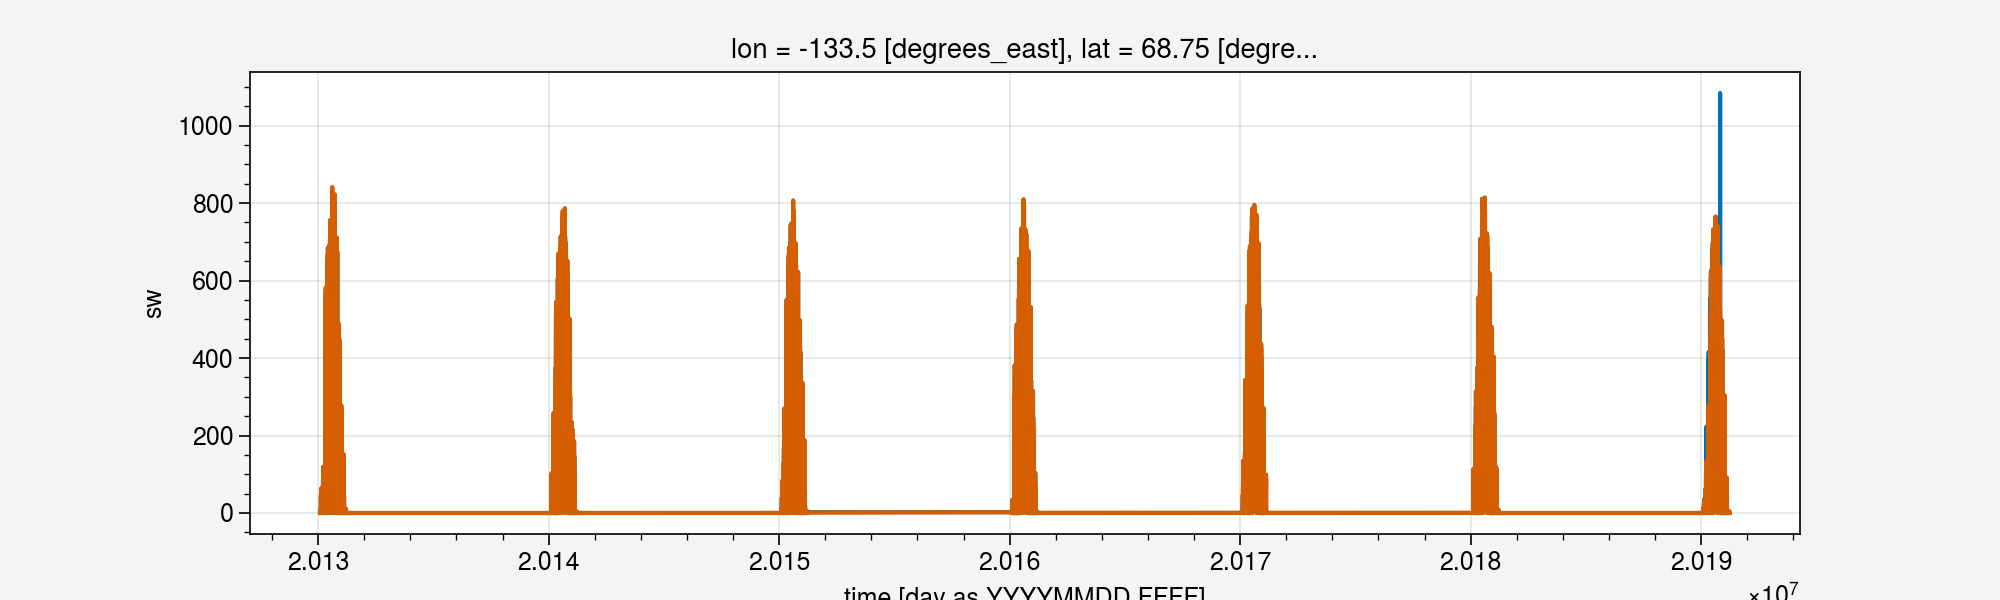

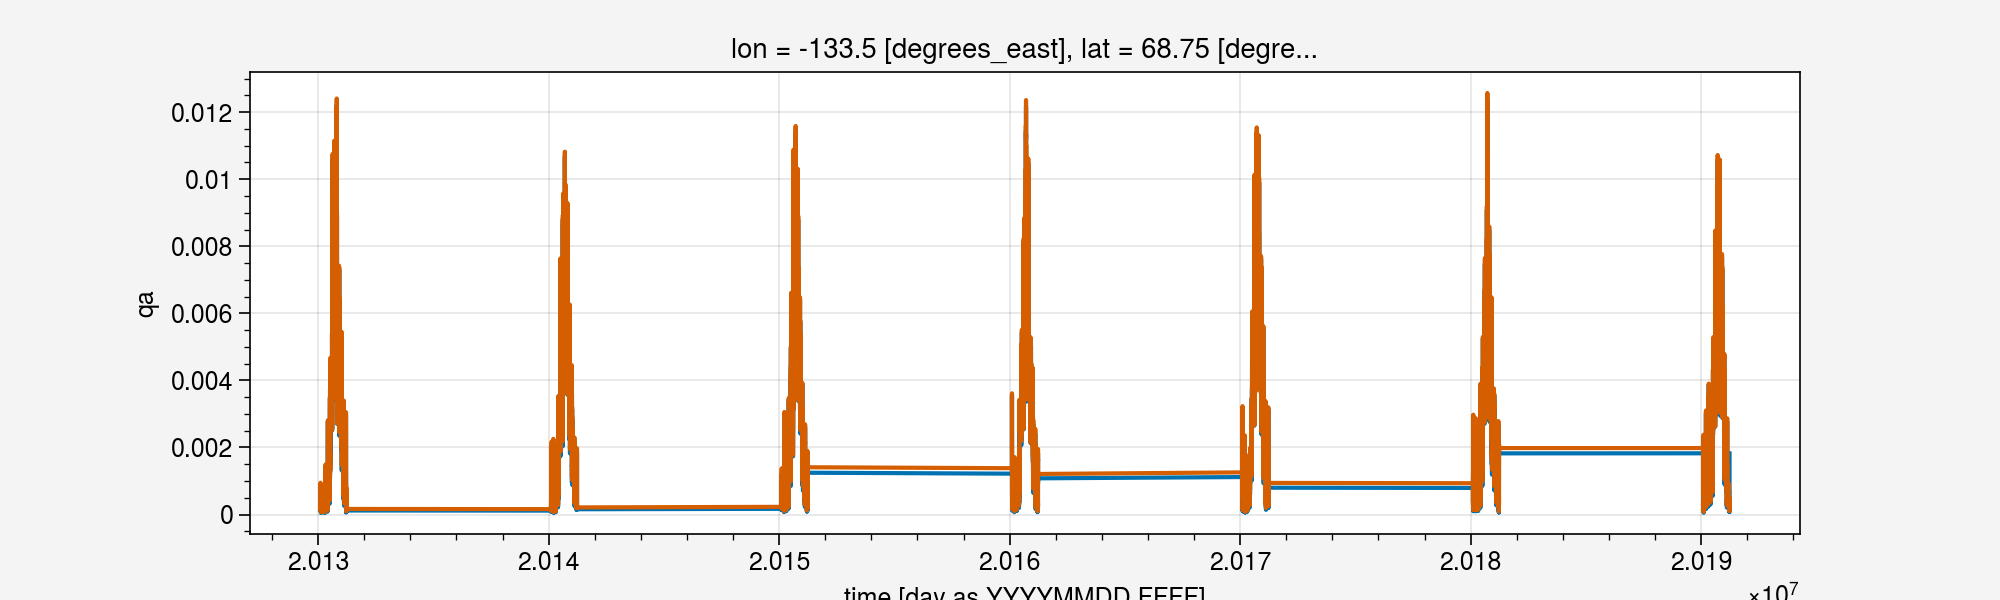

In [29]:
%matplotlib inline
for var, var2 in zip(
    ['LWdown', 'TotPrecip', 'Tair', 'Wind', 'Psurf', 'SWdown', 'Qair'], 
    ['lw', 'pr', 'ta', 'wi', 'ap', 'sw', 'qa']
):
    ds[var].plot(figsize=(10,3))
    forcing_gesa[var2].plot()